## **Subnets and Network Access Control Lists**

Ban đầu, khách hàng gửi đơn hàng cho thu ngân và sau đó thu ngân chuyển đơn hàng cho người pha cà phê. Quy trình này giữ cho dòng người diễn ra suôn sẻ khi có nhiều khách hàng.

Tuy nhiên, nếu có khách hàng cố gắng bỏ qua thu ngân và trực tiếp đưa đơn hàng cho người pha cà phê, điều này gây rối và hạn chế khách hàng tiếp cận phần của quán được hạn chế.

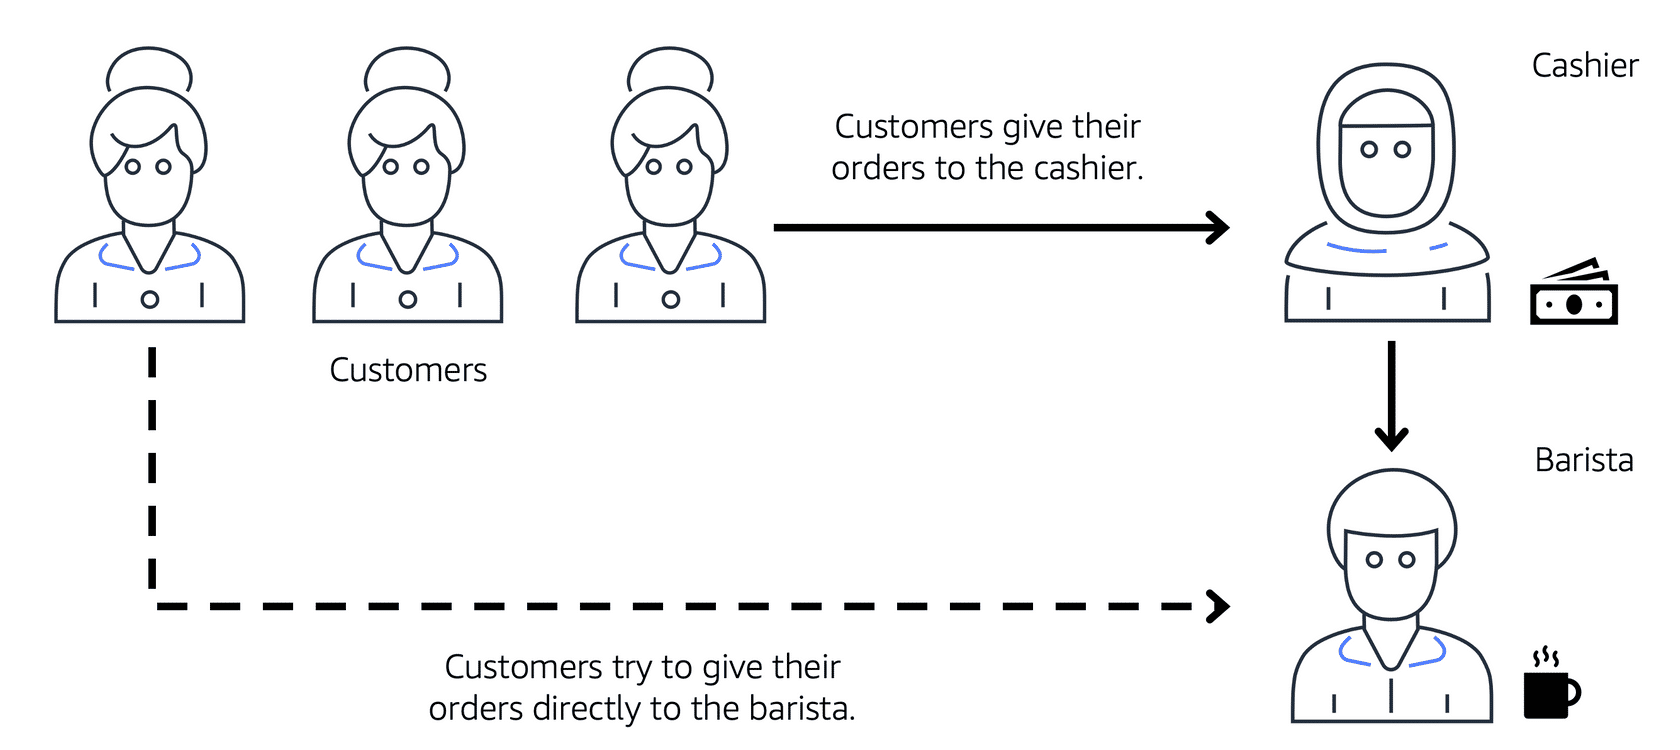

Để khắc phục, chủ quán chia khu vực quầy thành hai, đặt thu ngân và người pha cà phê ở vị trí làm việc riêng biệt. Khu vực thu ngân mở ra công khai để phục vụ khách hàng, trong khi khu vực người pha cà phê là riêng tư. Người pha cà phê vẫn nhận đơn hàng từ thu ngân, nhưng không trực tiếp từ khách hàng.

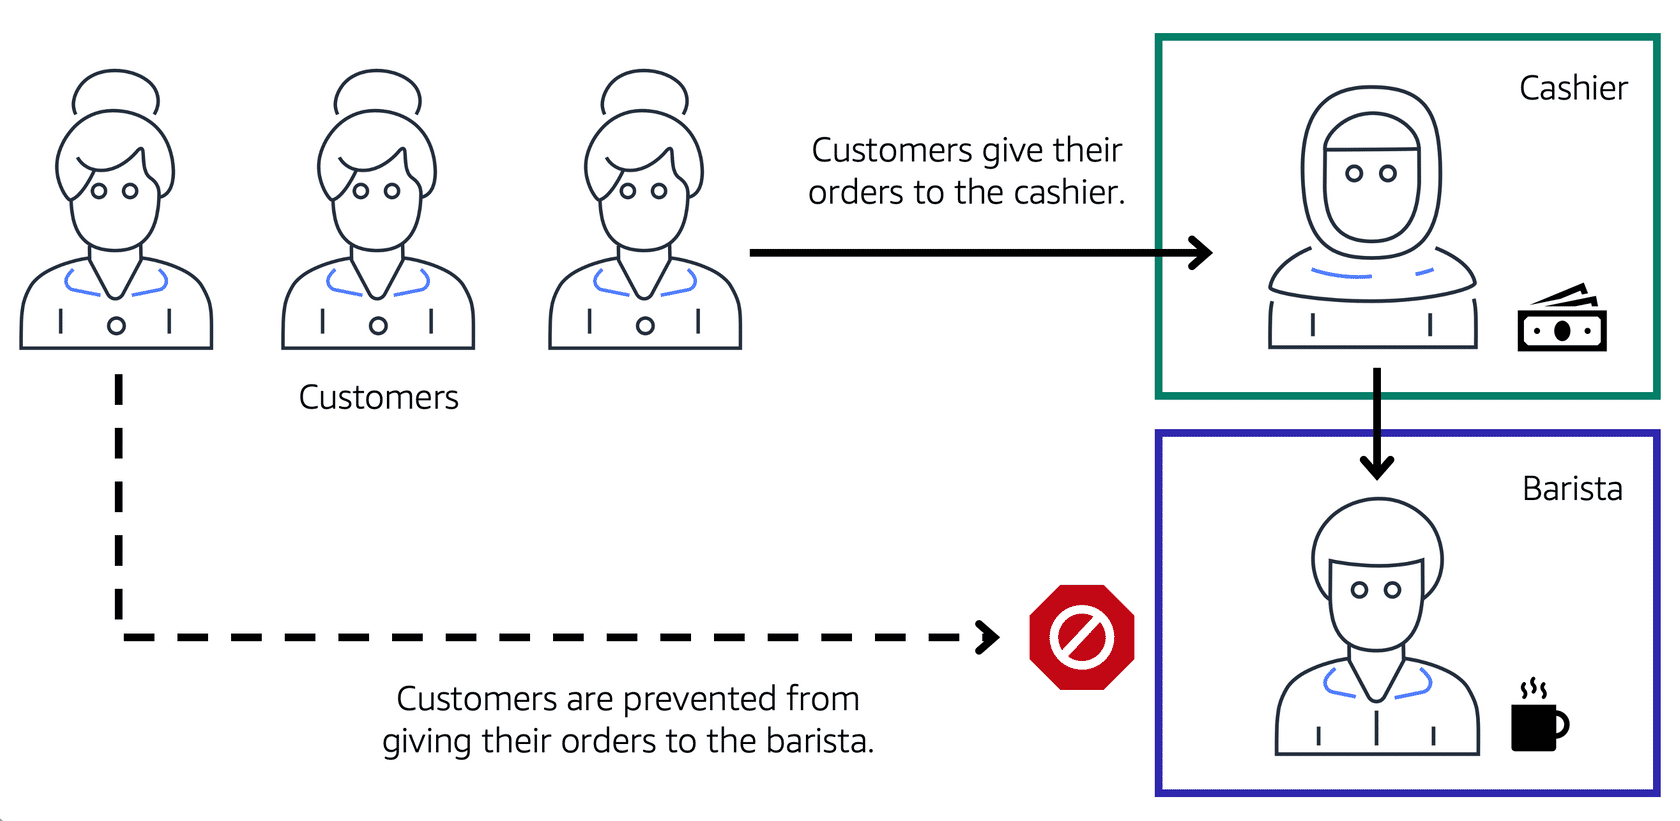

Tương tự, trong AWS, bạn có thể sử dụng dịch vụ mạng để cách ly tài nguyên và kiểm soát luồng dữ liệu mạng. Ví dụ, trong quán cà phê, khu vực quầy tượng trưng cho VPC, và mạng con giúp nhóm các tài nguyên lại với nhau.

### **Subnets**

Subnets là một phần của VPC mà bạn có thể nhóm tài nguyên dựa trên nhu cầu về bảo mật hoặc vận hành. Mạng con có thể là công cộng hoặc riêng tư.

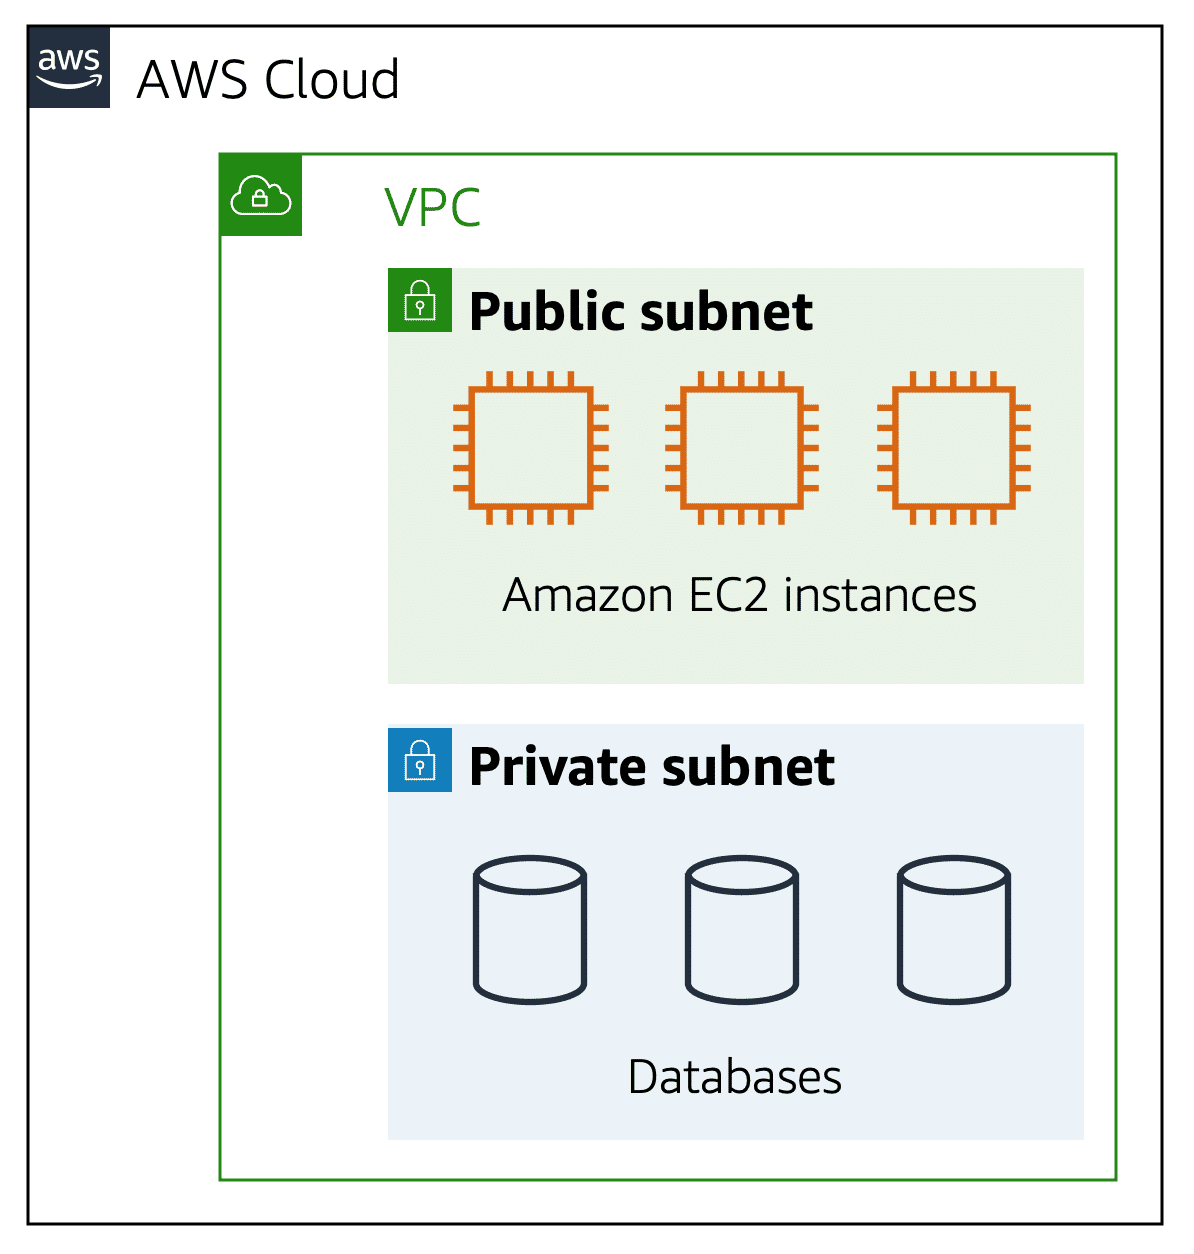

**Public Subnet** chứa các tài nguyên cần được truy cập bởi công chúng, chẳng hạn như trang web của cửa hàng trực tuyến.

**Private Subnet** chứa các tài nguyên chỉ nên được truy cập thông qua mạng riêng của bạn, chẳng hạn như cơ sở dữ liệu chứa thông tin cá nhân và lịch sử đặt hàng của khách hàng.

Trong một VPC, các mạng con có thể giao tiếp với nhau. Ví dụ, bạn có thể có một ứng dụng mà liên quan đến các phiên bản Amazon EC2 trong **public subnet** giao tiếp với cơ sở dữ liệu được đặt trong **private subnet**.

### **Network Traffic in a VPC**

Khi một khách hàng yêu cầu dữ liệu từ một ứng dụng được lưu trữ trong Đám mây AWS, yêu cầu này được gửi dưới dạng **Packet**. **Packet** là một đơn vị dữ liệu được gửi qua internet hoặc mạng.

Nó nhập vào một VPC thông qua một cổng Internet. Trước khi một gói tin có thể vào một mạng con hoặc ra khỏi mạng con, nó kiểm tra quyền. 

Những quyền này cho biết ai đã gửi gói tin và cách gói tin đang cố gắng giao tiếp với tài nguyên trong mạng con.

### **Network Access Control Lists (ACLs)**

Danh sách kiểm soát truy cập mạng (ACL) là một tường lửa ảo kiểm soát lưu lượng vào và ra tại mức mạng con.

Bạn có thể tưởng tượng người du lịch như là các gói tin và quan chức kiểm tra hộ chiếu như là một ACL mạng. 


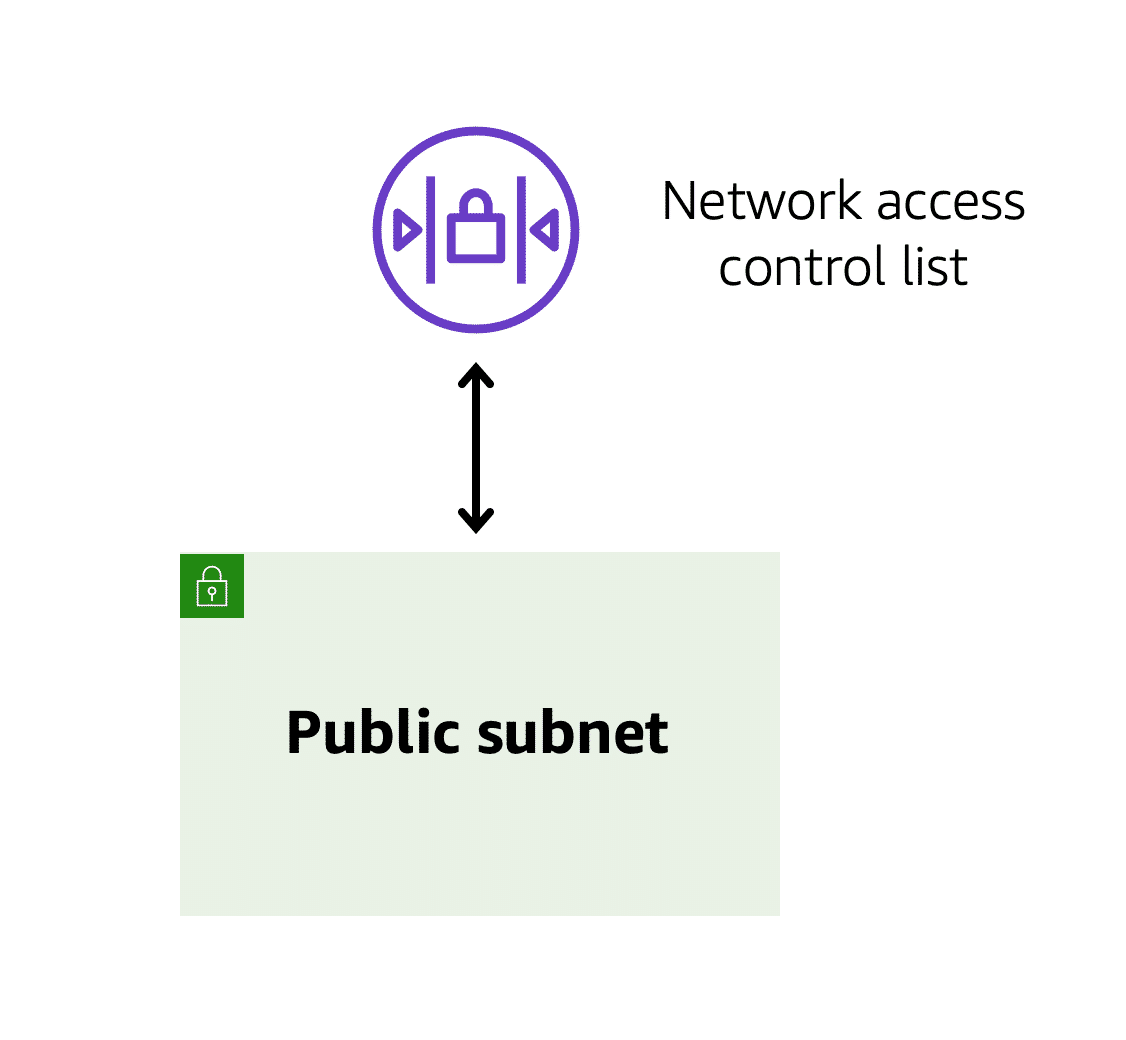

Mỗi tài khoản AWS bao gồm một ACL mạng mặc định. Khi cấu hình VPC của bạn, bạn có thể sử dụng ACL mạng mặc định của tài khoản hoặc tạo ACL mạng tùy chỉnh.

Mặc định, ACL mạng mặc định của tài khoản cho phép tất cả lưu lượng vào và ra, nhưng bạn có thể sửa đổi nó bằng cách thêm các quy tắc của riêng bạn. 

Đối với ACL mạng tùy chỉnh, tất cả lưu lượng vào và ra đều bị từ chối cho đến khi bạn thêm quy tắc để xác định lưu lượng nào được phép. 

Ngoài ra, tất cả ACL mạng đều có một quy tắc từ chối rõ ràng. Quy tắc này đảm bảo rằng nếu một gói tin không khớp với bất kỳ quy tắc nào khác trên danh sách, gói tin sẽ bị từ chối.

### **Stateless Packet Filtering**

ACL mạng thực hiện việc **lọc gói tin không lưu trạng thái**. Họ không ghi nhớ gì và kiểm tra các gói tin vượt qua biên giới mạng con cả hai chiều: vào và ra.

Hãy nhớ ví dụ trước về một người du lịch muốn vào một quốc gia khác. Điều này tương tự như việc gửi yêu cầu ra từ một phiên bản Amazon EC2 và đến internet.

Khi một gói tin trả lời cho yêu cầu đó trở lại mạng con, ACL mạng không ghi nhớ yêu cầu trước đó của bạn. ACL mạng kiểm tra gói tin trả lời dựa trên danh sách quy tắc của nó để xác định liệu có cho phép hay từ chối.

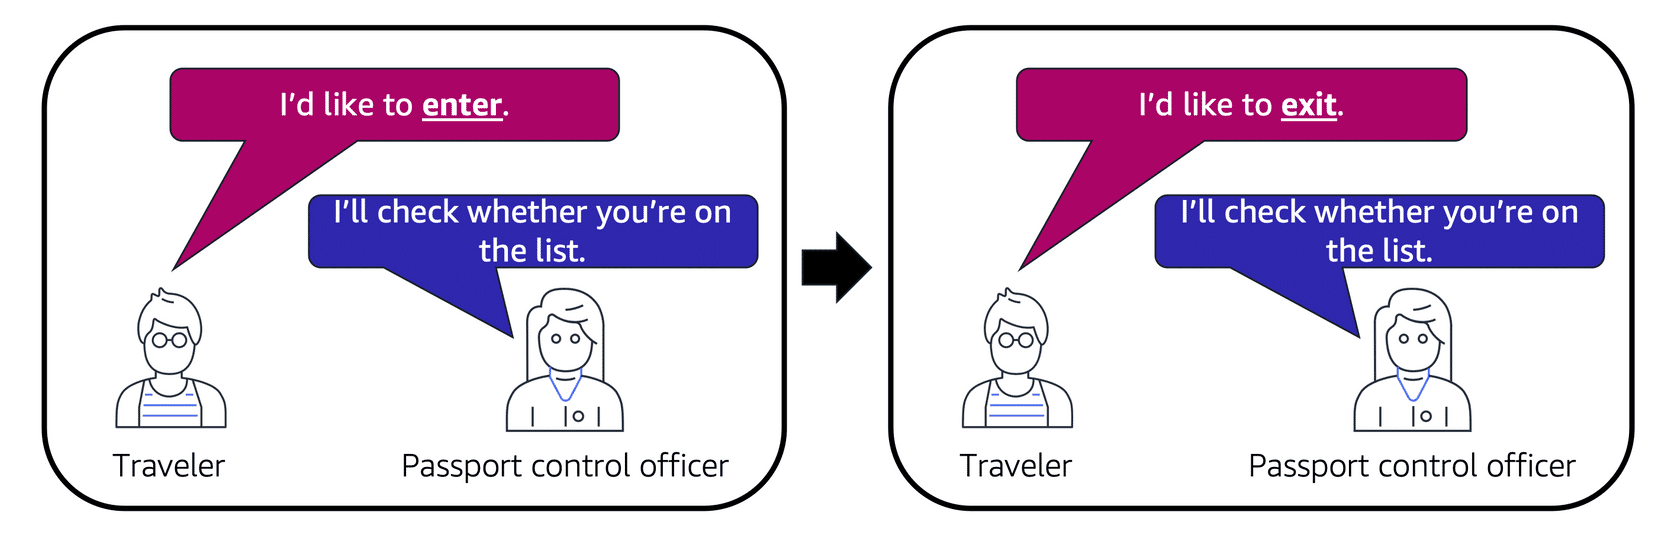

Sau khi một gói tin đã vào một mạng con, nó phải được xác minh quyền truy cập đối với các tài nguyên trong mạng con, chẳng hạn như các phiên bản Amazon EC2.

Thành phần VPC kiểm tra quyền gói tin cho một phiên bản Amazon EC2 là một **Security Groups**

### **Security Groups**

Nhóm bảo mật là một tường lửa ảo kiểm soát lưu lượng vào và ra cho một phiên bản Amazon EC2.

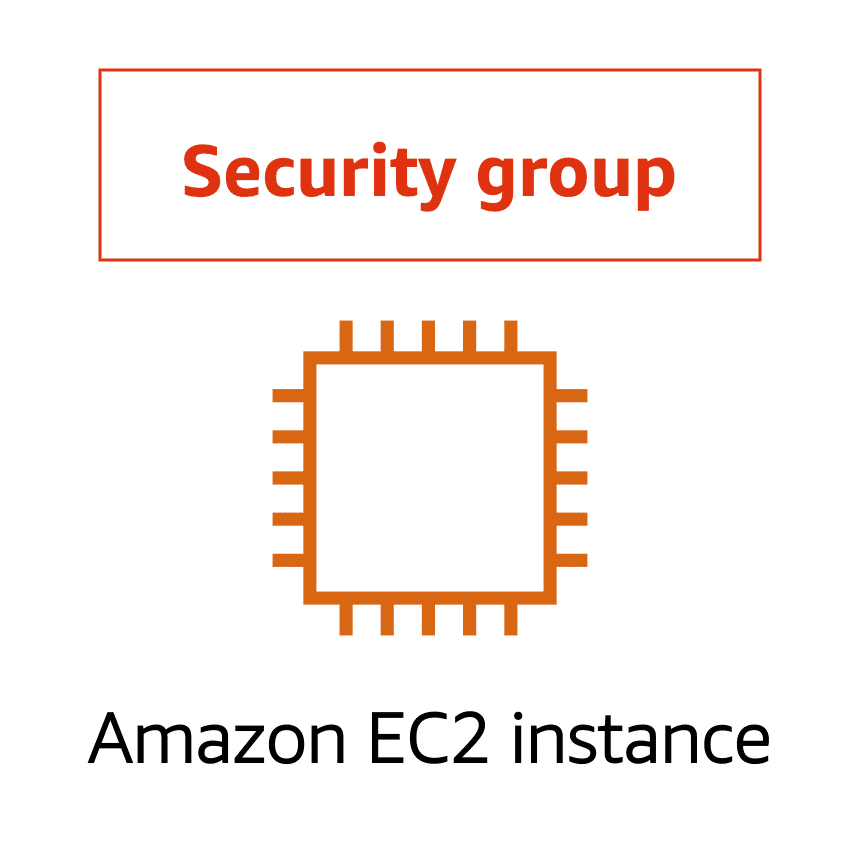

Mặc định, **một nhóm bảo mật từ chối tất cả lưu lượng vào và cho phép tất cả lưu lượng ra**. Bạn có thể thêm các quy tắc **tùy chỉnh để cấu hình lưu lượng nào được phép hoặc từ chối**.

Đối với ví dụ này, hãy tưởng tượng bạn ở trong một tòa nhà căn hộ với một người bảo vệ cửa đứng chào đón khách trong sảnh. Bạn có thể tưởng tượng khách là các gói tin và người bảo vệ cửa là một nhóm bảo mật. Khi khách đến, người bảo vệ cửa kiểm tra danh sách để đảm bảo họ có thể vào tòa nhà. Tuy nhiên, người bảo vệ cửa không kiểm tra danh sách mỗi khi khách ra khỏi tòa nhà.

Nếu bạn có nhiều phiên bản Amazon EC2 trong một mạng con, bạn có thể gán chúng vào cùng một nhóm bảo mật hoặc sử dụng các nhóm bảo mật khác nhau cho mỗi phiên bản.

### **Stateful Packet Filtering**

**Nhóm bảo mật (Security Group)** thực hiện việc **lọc gói tin có lưu trạng thái**. Họ nhớ những quyết định trước đó về gói tin đến.

Xem xét ví dụ tương tự về việc gửi yêu cầu ra từ một phiên bản Amazon EC2 đến internet.

Khi **một gói (packet)** tin trả lời cho yêu cầu đó trở lại phiên bản, nhóm bảo mật nhớ yêu cầu trước đó của bạn. 

Nhóm bảo mật cho phép gói tin trả lời tiếp tục đi, bất kể quy tắc nhóm bảo mật đang hiệu lực.

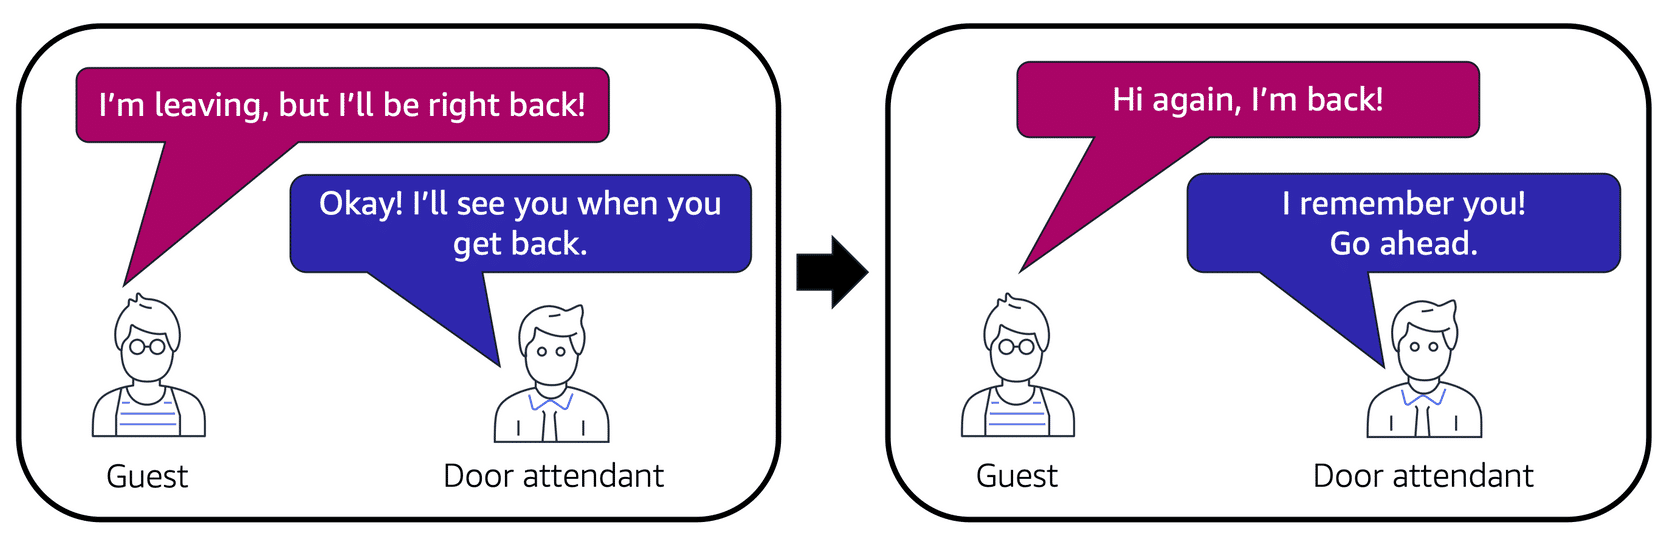

Cả hai ACL mạng và nhóm bảo mật đều cho phép bạn cấu hình các quy tắc tùy chỉnh cho lưu lượng trong VPC của bạn. 

Khi bạn tiếp tục tìm hiểu về bảo mật và mạng AWS, hãy chắc chắn hiểu rõ sự khác biệt giữa ACL mạng và nhóm bảo mật.

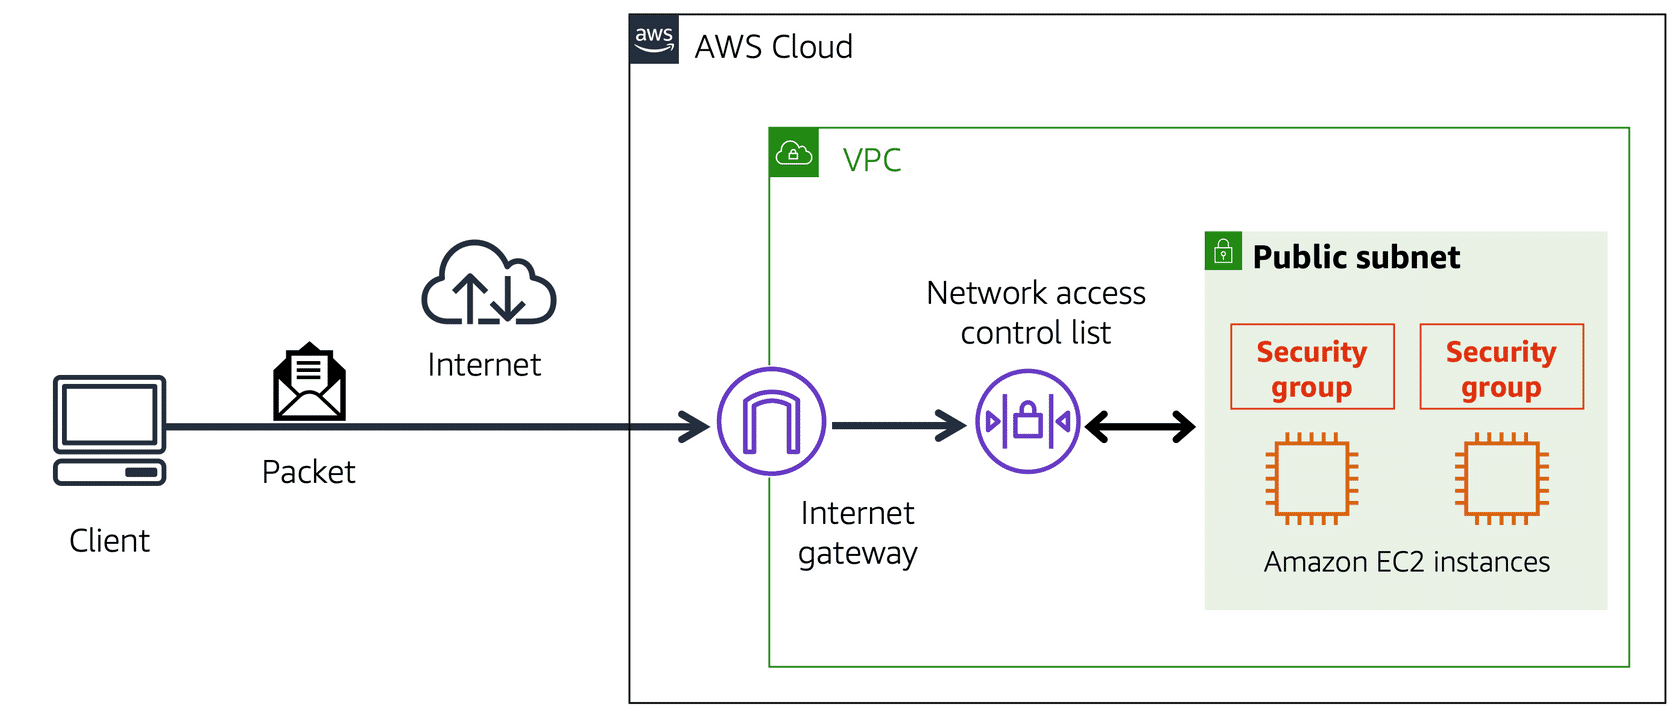